In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Final/CTG_Stock_Data.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna()  # Drop missing values

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna()  # Drop missing values
df = df.reset_index(drop=True)  # Reset the index


                    Open          High           Low         Close  \
Date                                                                 
2014-01-27  11717.867188  11856.540039  11648.531250  11717.867188   
2014-02-06  11648.531250  11717.867188  11509.858398  11648.531250   
2014-02-07  11579.194336  11717.867188  11509.858398  11579.194336   
2014-02-10  11509.858398  11648.531250  11440.521484  11509.858398   
2014-02-11  11579.194336  11717.867188  11440.521484  11509.858398   

               Adj Close     Volume  
Date                                 
2014-01-27  11717.867188   608510.0  
2014-02-06  11648.531250  1140509.0  
2014-02-07  11579.194336   826750.0  
2014-02-10  11509.858398  1639712.0  
2014-02-11  11509.858398  2082063.0  


In [ ]:
# 2. chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']]  # Biến phụ thuộc theo mảng 2 chiều

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index  # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình Random Forest
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Ví dụ các giá trị cho số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Ví dụ các giá trị cho độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Ví dụ các giá trị cho số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4]  # Ví dụ các giá trị cho số lượng mẫu tối thiểu ở lá
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
rf_model = grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best score: 2923817.656439584


In [ ]:
# dự đoán test
y_pred = rf_model.predict(x_test)
y_pred

array([29116.3085935 , 29221.1779296 , 30165.97855808, 30499.71061183,
       30187.75970075, 30689.571875  , 31035.9101565 , 30460.92998035,
       30685.4069008 , 30499.71061183, 29172.158789  , 29172.158789  ,
       30165.97855808, 32013.7757814 , 31358.0898438 , 32501.4814455 ,
       31210.4277345 , 30460.92998035, 31084.2650576 , 32248.4027344 ,
       32269.2046876 , 31667.3824221 , 33527.6625    , 33718.3375    ,
       32756.1519532 , 32756.1519532 , 31667.3824221 , 31736.7187502 ,
       32432.1447267 , 32607.0783204 , 32248.4027344 , 30460.92998035,
       30971.03574239, 30460.92998035, 31035.9101565 , 30972.8089842 ,
       30549.61269561, 30460.92998035, 30549.61269561, 30165.97855808,
       29513.4667966 , 29555.73243472, 29485.68759798, 28810.46835967,
       29315.4287111 , 28772.36028641, 28916.14440129, 28569.95436173,
       28720.12419   , 28861.25585956, 28861.25585956, 28422.5888669 ,
       28569.95436173, 29315.4287111 , 29340.99790764, 29315.4287111 ,
      

In [ ]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1, 1)
last_data

array([[26750.]])

In [ ]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = rf_model.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1, 1)
x_next_30_days

[array([26375.80023418]),
 array([25970.1228515]),
 array([25563.20943997]),
 array([25472.84109366]),
 array([24933.86523119]),
 array([24531.2515628]),
 array([24199.36120448]),
 array([23770.28364262]),
 array([23460.8696778]),
 array([22530.46025404]),
 array([21842.72871113]),
 array([21402.5000389]),
 array([20835.6156254]),
 array([20279.53812534]),
 array([19909.9734379]),
 array([19669.03001292]),
 array([19096.6576176]),
 array([18577.55755233]),
 array([18000.33193367]),
 array([17747.83122389]),
 array([17525.29344283]),
 array([17347.9898434]),
 array([16761.52356464]),
 array([16576.62207063]),
 array([16264.01111878]),
 array([16010.96847552]),
 array([15568.75440004]),
 array([15352.63090111]),
 array([15139.33429643]),
 array([14883.30939921])]

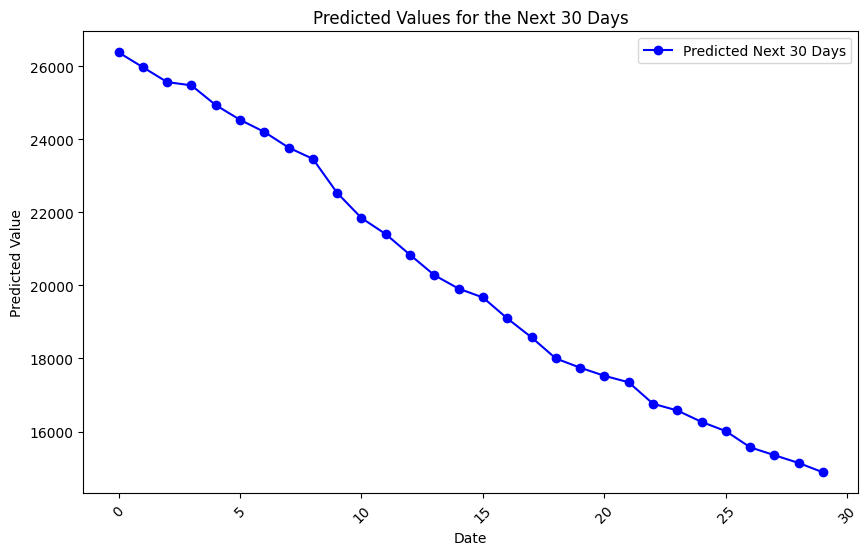

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1, 1)

In [ ]:
# 7. Đánh giá độ chính xác test bằng RMSE, MSLE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)
# MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)

Testing RMSE: Close    445.427268
dtype: float64
Testing MAPE: 0.013037784374218497
Testing MSLE: 0.0003195896285723874


In [ ]:
# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index + 30, step=1)

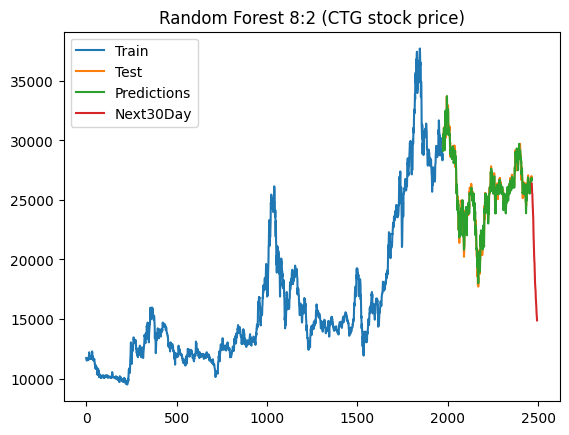

In [ ]:
# 9.Vẽ hình
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates, x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.title('Random Forest 8:2 (CTG stock price)')
plt.show()